In [91]:
#Import packages
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from plotly.graph_objs import pie,layout,Figure
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
# To print multiple outputs together
from __future__ import print_function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Load the data
path = ('C:/Users/Shrutika/Downloads/Company_assisgnments/Online Retail.xlsx')

online_retail = pd.read_excel(path)

In [4]:
online_retail.shape
online_retail.head(10)

(541909, 8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [60]:
online_retail.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sales               0
dtype: int64

In [6]:
online_retail.describe(percentiles = [0.05,0.20,0.85,0.90,0.99])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
5%,1.000000,0.420000,12626.000000
20%,1.000000,0.850000,13536.000000
50%,3.000000,2.080000,15152.000000
85%,12.000000,5.790000,17426.000000
90%,24.000000,7.950000,17719.000000
99%,100.000000,18.000000,18212.000000


In [7]:
category_columns = list(set(online_retail.columns) - set(online_retail._get_numeric_data().columns))

category_columns
'''Number of Unique category per category columns '''
for i in category_columns:
    print(i, online_retail[i].nunique())
    
''' Distribution of unique values per category column'''  
for i in category_columns:
    print(i , online_retail[i].value_counts())
    print("--"*10)

['Country', 'StockCode', 'Description', 'InvoiceDate', 'InvoiceNo']

'Number of Unique category per category columns '

Country 38
StockCode 4070
Description 4223
InvoiceDate 23260
InvoiceNo 25900


' Distribution of unique values per category column'

Country United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [114]:
online_retail['CustomerID'].value_counts().head(10)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: CustomerID, dtype: int64

In [9]:
#Calculate Sales 
online_retail['Sales'] = online_retail['Quantity'] * online_retail['UnitPrice']

# Product analysis

In [10]:
Product_sales = online_retail[['Description', 'Sales']].groupby('Description').sum().sort_values(['Sales'],ascending = False)
Product_sales

,Sales
Description,
DOTCOM POSTAGE,206245.480
REGENCY CAKESTAND 3 TIER,164762.190
WHITE HANGING HEART T-LIGHT HOLDER,99668.470
PARTY BUNTING,98302.980
JUMBO BAG RED RETROSPOT,92356.030
RABBIT NIGHT LIGHT,66756.590
POSTAGE,66230.640
PAPER CHAIN KIT 50'S CHRISTMAS,63791.940
ASSORTED COLOUR BIRD ORNAMENT,58959.730


In [13]:
#Calculate Contribution %
Product_sales['Contribution %'] = ((Product_sales['Sales'] / Product_sales['Sales'].sum(axis=0))*100).round(0)
Product_sales.reset_index(inplace = True)

In [112]:
trace1 = go.Bar(
            x= Product_sales['Description'][:16],
            y = Product_sales['Sales'], name = 'Sales',text = Product_sales['Sales'],
             marker=dict(color='rgb(34,163,192)'),textposition="inside",texttemplate='%{text:.2s}')

trace2 = go.Scatter(
            x=  Product_sales['Description'][:16],
            y = Product_sales['Contribution %'],name = 'Contribution %',yaxis = 'y2',text = Product_sales['Contribution %'],
            mode='lines+markers+text',marker=dict(color='rgb(255, 144, 14)',size=8), textposition='top right',textfont=dict(color='#E58606')
    )
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(height = 800, width =1000, xaxis=dict(title="Product_Name",tickangle=-45), yaxis=dict(title="Sales"))

fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)

The negative balance could be caused because there is a delay in getting the products processed and on the warehouse shelves. 

There could also be issues in production that cause less of a product to be produced than is needed. 
This could happen when the invoices were not clear

In [ ]:
online_retail[online_retail['Description'] == 'AMAZON FEE'].shape

In [ ]:
online_retail[online_retail['Description'] == 'Manual'].shape

In [ ]:
online_retail[online_retail['Description'] == 'Adjust bad debt'].shape


In [ ]:
online_retail[online_retail['Description'] == 'CRUK Commission'].shape


In [110]:
online_retail[online_retail['Description'] == 'Bank Charges'].shape

(37, 9)

# Country analysis


In [22]:
country_revenue = online_retail[['Country','Sales']].groupby('Country').sum().sort_values(['Sales'], ascending = False)
country_revenue['Contribution %'] = ((country_revenue['Sales']/country_revenue['Sales'].sum(axis=0))*100).round(0)
country_revenue.reset_index(inplace = True)     
country_revenue[:10]

,Country,Sales,Contribution %
0,United Kingdom,8.187806e+06,84.0
1,Netherlands,2.846615e+05,3.0
2,EIRE,2.632768e+05,3.0
3,Germany,2.216982e+05,2.0
4,France,1.974039e+05,2.0
5,Australia,1.370773e+05,1.0
6,Switzerland,5.638535e+04,1.0
7,Spain,5.477458e+04,1.0
8,Belgium,4.091096e+04,0.0
9,Sweden,3.659591e+04,0.0


In [113]:
trace1 = go.Bar(
            x = country_revenue['Country'][:15], y = country_revenue['Sales'],
            name = 'Sales', text = country_revenue['Sales'],
            marker=dict(color='rgb(34,163,192)'),textposition="inside",texttemplate='%{text:.2s}')

trace2 = go.Scatter(
            x= country_revenue['Country'][:15],y = country_revenue['Contribution %'],
            name = 'Contribution %',text = country_revenue['Contribution %'],
           mode='lines+markers+text',marker=dict(color='rgb(255, 144, 14)',size=8), textposition='top right',textfont=dict(color='#E58606'))

fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.update_layout(height = 800, width =1000, xaxis=dict(title="Countries",tickangle=-45), yaxis=dict(title="Sales"))

fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)

# Customers generating high Sales 

In [31]:
cust_revenue = online_retail[['CustomerID','Sales']].groupby('CustomerID').sum().sort_values(['Sales'], ascending = False)
cust_revenue['Contribution %'] = ((cust_revenue['Sales']/cust_revenue['Sales'].sum(axis=0))*100).round(0)
cust_revenue.reset_index(inplace = True)     
cust_revenue[:16]

,CustomerID,Sales,Contribution %
0,14646.0,279489.02,3.0
1,18102.0,256438.49,3.0
2,17450.0,187482.17,2.0
3,14911.0,132572.62,2.0
4,12415.0,123725.45,1.0
5,14156.0,113384.14,1.0
6,17511.0,88125.38,1.0
7,16684.0,65892.08,1.0
8,13694.0,62653.10,1.0
9,15311.0,59419.34,1.0


In [32]:
trace1 = go.Bar(
            x = cust_revenue['CustomerID'][:10], y = cust_revenue['Sales'],
            name = 'Sales', text = cust_revenue['Sales'],
            marker=dict(color='rgb(34,163,192)'),textposition="inside",texttemplate='%{text:.2s}')

trace2 = go.Scatter(
            x= cust_revenue['CustomerID'][:10],y = cust_revenue['Contribution %'],
            name = 'Contribution %',text = cust_revenue['Contribution %'],
           mode='lines+markers+text',marker=dict(color='rgb(255, 144, 14)',size=8), textposition='top right',textfont=dict(color='#E58606'))

fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.update_layout(height = 800, width =1000, xaxis=dict(title="Customers",tickangle=-45), yaxis=dict(title="Sales"))

fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)

# Unique Customers across country

In [115]:
cust_country = online_retail[['CustomerID','Country']].drop_duplicates()
cust_country =cust_country.groupby(['Country'])['CustomerID'].count().reset_index().sort_values(['CustomerID'],ascending = False)
cust_country.head(10)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [58]:
fig = px.bar(cust_country[:15], x ="Country", y = "CustomerID", title = "Unique Customers across different countries",text="CustomerID")
ss= fig.update_traces(texttemplate='%{text:.s}', textposition='outside')
fig.show()

In [116]:
#Check Null values
online_retail.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sales               0
dtype: int64

# Treating missing values

In [64]:
online_retail_1 = online_retail[pd.notnull(online_retail['CustomerID'])]
online_retail_1.shape

(406829, 9)

In [66]:
online_retail_1.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

# Quantity which are less than zero

In [72]:
online_retail_1[online_retail_1['Quantity']< 0].shape

(8905, 9)

In [73]:
# Quantity which greater than zero
online_retail_1[online_retail_1['Quantity']> 0].shape

(397924, 9)

# Invoice

In [74]:
online_retail_1['InvoiceDate'].min()
online_retail_1['InvoiceDate'].max()


Timestamp('2010-12-01 08:26:00')

Timestamp('2011-12-09 12:50:00')

In [75]:
import datetime as dt
NOW = dt.datetime(2011,12,10)
online_retail_1['InvoiceDate'] = pd.to_datetime(online_retail_1['InvoiceDate'])

C:\Users\Shrutika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Creating RFM table

In [85]:
online_retail_1_process = online_retail_1.groupby('CustomerID').agg({
                                                        'InvoiceDate': lambda x: (NOW - x.max()).days,
                                                        'InvoiceNo': lambda x: len(x),
                                                        'Sales': lambda x: x.sum()})
online_retail_1_process.head()

,InvoiceDate,InvoiceNo,Sales
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [86]:
online_retail_1_process.rename(columns ={'InvoiceDate': 'Recency',
                                         'InvoiceNo': 'Frequency',
                                         'Sales': 'MonetaryValue'}, inplace= True)

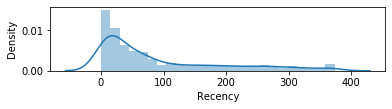

In [96]:
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(online_retail_1_process['Recency'])

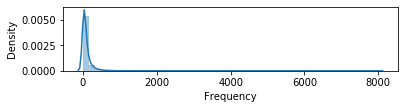

In [97]:
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(online_retail_1_process['Frequency'])

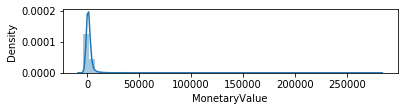

In [98]:
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(online_retail_1_process['MonetaryValue'])

In [99]:
# RFM quantile values to create RFM Segments

quantiles = online_retail_1_process.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [100]:
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'MonetaryValue': {0.25: 293.36249999999995,
  0.5: 648.0750000000002,
  0.75: 1611.725}}

In [101]:
rfm = online_retail_1_process

In [102]:
# Function to calculate Recency, Frequency, Monetary score
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [103]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [104]:
#Create columns for Recency,Frequency and Monetary value

rfm['r_quartile'] = rfm['Recency'].apply(RScore, args=('Recency',quantiles))
rfm['f_quartile'] = rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
rfm['m_quartile'] =rfm['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles))
rfm.head()

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,2,0.00,4,4,4
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [106]:
#Add RFMscore column
rfm['RFMScore'] = rfm.r_quartile.map(str)  + rfm.f_quartile.map(str)  + rfm.m_quartile.map(str)
rfm.head()

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,2,0.00,4,4,4,444
12347.0,2,182,4310.00,1,1,1,111
12348.0,75,31,1797.24,3,3,1,331
12349.0,18,73,1757.55,2,2,1,221
12350.0,310,17,334.40,4,4,3,443


## Best Customers with the RFM score

In [118]:
rfm[rfm['RFMScore']=='111'].sort_values('MonetaryValue', ascending=False).head(15)

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
14646.0,1,2085,279489.02,1,1,1,111
18102.0,0,433,256438.49,1,1,1,111
17450.0,8,351,187482.17,1,1,1,111
14911.0,1,5903,132572.62,1,1,1,111
14156.0,9,1420,113384.14,1,1,1,111
17511.0,2,1076,88125.38,1,1,1,111
16684.0,4,281,65892.08,1,1,1,111
13694.0,3,585,62653.10,1,1,1,111
15311.0,0,2491,59419.34,1,1,1,111
